In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import regularizers
import random
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
from keras import  callbacks
from keras.optimizers import SGD, RMSprop
from sklearn.manifold import TSNE
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
r = np.loadtxt("/content/drive/MyDrive/MyDrive/matrixPos.txt")
print(len(r))


913952


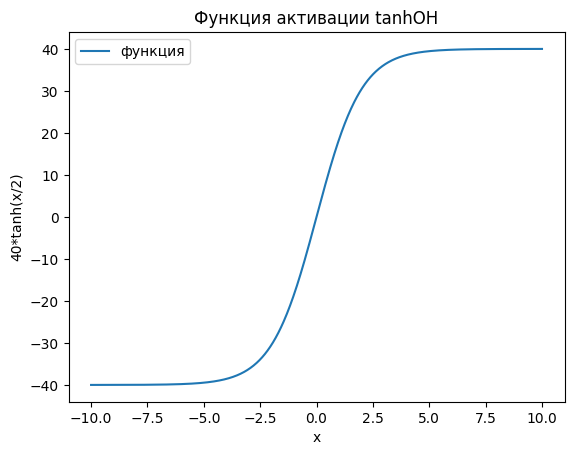

In [108]:
# Функция активации
def tanhOH(x):
    return 40*tf.math.tanh(x/2)
lain = np.linspace(-10, 10, 1000)
fig = plt.figure()
plt.plot(lain, tanhOH(lain))
plt.title('Функция активации tanhOH')
plt.ylabel('40*tanh(x/2)')
plt.xlabel('x')
plt.legend(['функция'], loc='upper left')
plt.show()

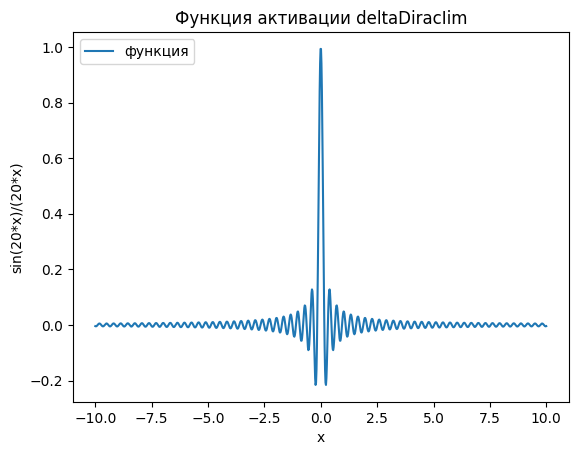

In [103]:
# Функция активации
def deltaDiracIim(x):
    return tf.math.sin(20*x)/(20*x)
lain = np.linspace(-10, 10, 1000)
fig = plt.figure()
plt.plot(lain, deltaDiracIim(lain))
plt.title('Функция активации deltaDiracIim')
plt.ylabel('sin(20*x)/(20*x)')
plt.xlabel('x')
plt.legend(['функция'], loc='upper left')
plt.show()

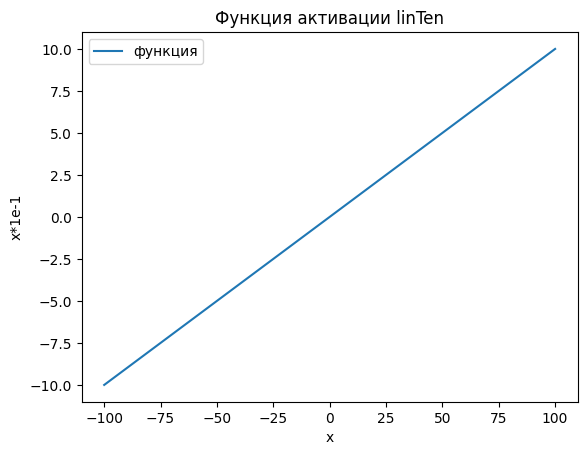

In [111]:
def linTen(x):
    return x*1e-1
lain = np.linspace(-100, 100, 1000)
fig = plt.figure()
plt.plot(lain, linTen(lain))
plt.title('Функция активации linTen')
plt.ylabel('x*1e-1')
plt.xlabel('x')
plt.legend(['функция'], loc='upper left')
plt.show()

In [5]:
y = np.zeros((len(r), 1))
x = np.zeros((len(r), 5))
for i in range(0, len(r)-1):
  arr = r[i]
  arr = arr.ravel()
  y[i,:] = arr[-1]
  x[i, :] = arr[:-1]

In [ ]:
print(max(y[:,:]))

[34.1121]


In [6]:
#перемешивание выборки
n_samples = len(x)
indices = np.random.permutation(n_samples)
x, y = x[indices], y[indices]

In [7]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 21)

In [144]:

# оптимизатор SGD - среднеквадратичная ошибка
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation=tanhOH, input_shape=(5,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.2),kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='leaky_relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation=deltaDiracIim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='leaky_relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='leaky_relu')
  ])

model.compile(loss='MSE', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), metrics=['MSE'])

In [115]:
# оптимизатор ADAM - среднеквадратичная ошибка
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation=tanhOH, input_shape=(5,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.2),kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=linTen, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=deltaDiracIim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=linTen, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=deltaDiracIim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=linTen, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=deltaDiracIim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=linTen, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=deltaDiracIim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation=tanhOH, kernel_initializer=RandomNormal(mean=0.0, stddev=0.2), kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation=tanhOH)
  ])

model.compile(loss='MSE', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['MSE'])

In [145]:
# оптимизатор SGD - среднеквадратичная ошибка
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 20, batch_size = 100000, validation_data=(X_test, y_test))

Epoch 1/20
9/9 [==============================] - 11s 1s/step - loss: 22.8916 - MSE: 0.0113 - val_loss: 22.8367 - val_MSE: 0.0027
Epoch 2/20
9/9 [==============================] - 10s 1s/step - loss: 22.8110 - MSE: 0.0105 - val_loss: 22.7559 - val_MSE: 0.0012
Epoch 3/20
9/9 [==============================] - 10s 1s/step - loss: 22.7297 - MSE: 0.0100 - val_loss: 22.6741 - val_MSE: 0.0011
Epoch 4/20
9/9 [==============================] - 10s 1s/step - loss: 22.6477 - MSE: 0.0096 - val_loss: 22.5944 - val_MSE: 0.0028
Epoch 5/20
9/9 [==============================] - 10s 1s/step - loss: 22.5662 - MSE: 0.0093 - val_loss: 22.5116 - val_MSE: 0.0011
Epoch 6/20
9/9 [==============================] - 9s 1s/step - loss: 22.4850 - MSE: 0.0092 - val_loss: 22.4303 - val_MSE: 7.3339e-04
Epoch 7/20
9/9 [==============================] - 10s 1s/step - loss: 22.4040 - MSE: 0.0090 - val_loss: 22.3500 - val_MSE: 0.0010
Epoch 8/20
9/9 [==============================] - 10s 1s/step - loss: 22.3233 - MSE: 0.

In [ ]:
# оптимизатор ADAM - среднеквадратичная ошибка
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 100, batch_size = 100000, validation_data=(X_test, y_test))

In [146]:
loss = model.evaluate(X_test, y_test, batch_size = 100)
print('Test loss:', loss)

457/457 [==============================] - 1s 1ms/step - loss: 21.3285 - MSE: 9.1446e-04
Test loss: [21.32854461669922, 0.0009144622599706054]


In [ ]:
i =76660
test = [[x[i,0] , x[i,1] , x[i,2] , x[i,3] , x[i,4]]]
print(test)
print(y[i,:])


In [ ]:
predicted_output = model.predict(test)
print(predicted_output)

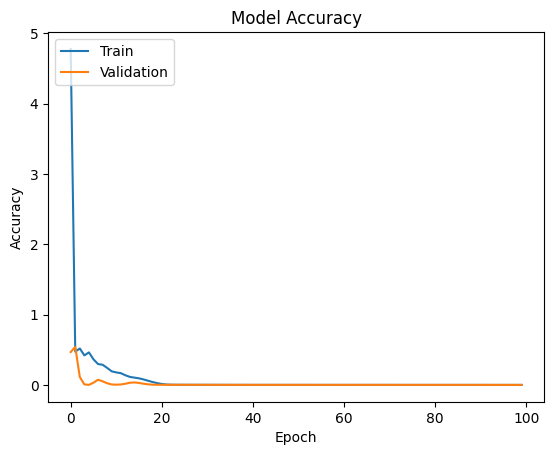

In [ ]:
# отображение кривых обучения и проверки
# plt.plot(history.history['accuracy'])
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


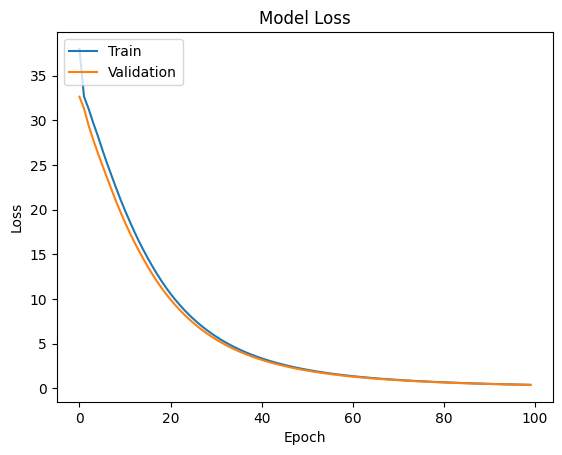

In [ ]:
# отображение кривых функции потерь обучения и проверки
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

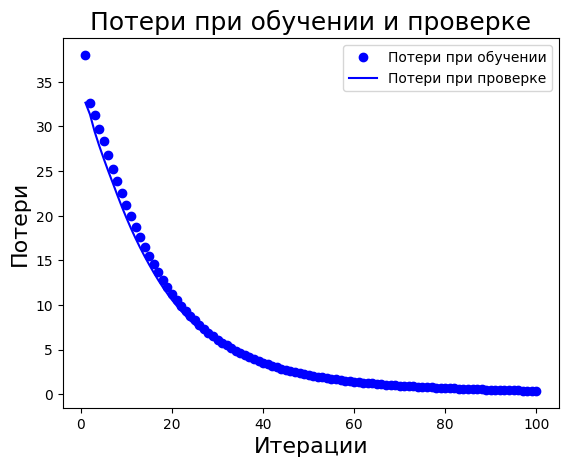

In [ ]:
# график потерь
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Потери при обучении')
plt.plot(epochs, val_loss, 'b', label='Потери при проверке')
plt.title('Потери при обучении и проверке',  fontsize=18)
plt.xlabel('Итерации',  fontsize=16)
plt.ylabel('Потери',  fontsize=16)
plt.legend()
plt.show()

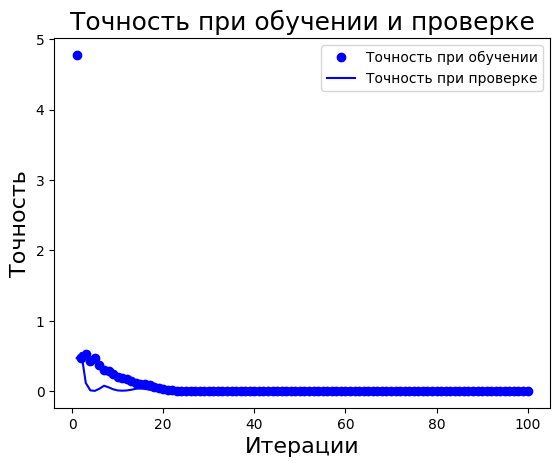

In [ ]:
# график точности
plt.clf()
acc = history.history['MSE']
val_acc = history.history['val_MSE']
plt.plot(epochs, acc, 'bo', label='Точность при обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.title('Точность при обучении и проверке',  fontsize=18)
plt.xlabel('Итерации',  fontsize=16)
plt.ylabel('Точность',  fontsize=16)
plt.legend()
plt.show()

In [16]:
# Выделение признаков и целевой переменной

yy = np.zeros((8000, 1))
xx = np.zeros((8000, 5))

for i in range(0,8000):
  xx[i, :] = x[i, :]
  yy[i,:] = y[i,:]

XX = xx[:,:]
YY = yy[:,:]

In [9]:
XX = x[:,:]
YY = y[:,:]

In [17]:
# Применение метода t-SNE для понижения размерности до 2 столбцов
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(XX)

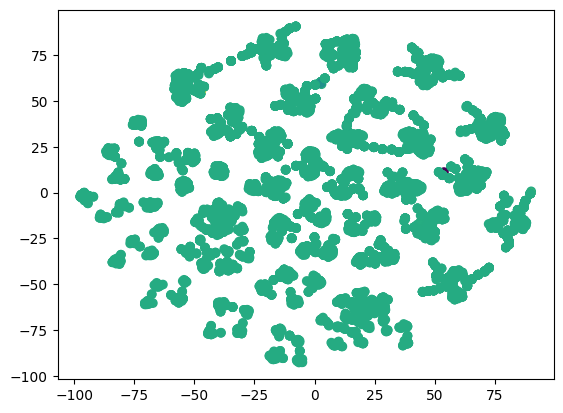

In [20]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=YY)
plt.show()

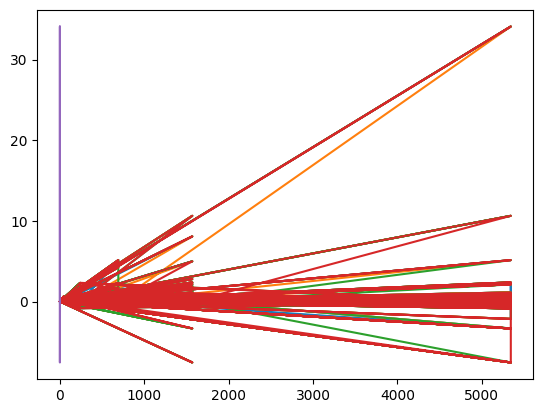

In [21]:
plt.plot(x[:, 0], y[:,0] )
plt.plot(x[:, 1], y[:,0] )
plt.plot(x[:, 2], y[:,0] )
plt.plot(x[:, 3], y[:,0] )
plt.plot(x[:, 4], y[:,0] )
plt.show()